In [2]:
!conda list

# packages in environment at F:\anaconda3\envs\fake-news-env:
#
# Name                    Version                   Build  Channel
backcall                  0.2.0              pyhd3eb1b0_0  
ca-certificates           2021.10.26           haa95532_4  
certifi                   2021.10.8        py38haa95532_2  
colorama                  0.4.4              pyhd3eb1b0_0  
debugpy                   1.5.1            py38hd77b12b_0  
decorator                 5.1.1              pyhd3eb1b0_0  
entrypoints               0.3                      py38_0  
ipykernel                 6.4.1            py38haa95532_1  
ipython                   7.31.1           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
jedi                      0.18.1           py38haa95532_1  
jupyter_client            7.1.2              pyhd3eb1b0_0  
jupyter_core              4.9.1            py38haa95532_0  
matplotlib-inline         0.1.2              pyhd3eb1b0_2  
nest-asyncio              1.5

# Load data

In [3]:
import json
import numpy as np
import nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# create corpus of articles
with open('train.json', 'r') as f:
    data = json.load(f)

In [6]:
data

{'train-0': {'text': 'why houston flooding isn‘t a sign of climate change\nDistinguished US climate scientist, Dr Roy Spencer writes: "In the context of climate change, is what we are seeing in Houston a new level of disaster which is becoming more common? The flood disaster unfolding in Houston is certainly very unusual. But so are other natural weather disasters, which have always occurred and always will occur....Major floods are difficult to compare throughout history because of the ways we alter the landscape., For example, as cities like Houston expand over the years, soil is covered up by roads, parking lots and buidings, with water rapidly draining off rather than soaking into the soil. The population of Houston is now ten times what is was in the 1920s. \xa0The Houston metroplex has expanded greatly and the water drainage is basically in the direction of downtown Houston."',
  'label': 1},
 'train-1': {'text': 'The U.N. Intergovernmental Panel on Climate Change (IPCC) released

In [25]:
corpus = []
label = []
for i in data:
    corpus.append(data[i]['text'])
    label.append(data[i]['label'])
len(corpus)

with open('train_real_1.json', 'r') as f:
    data_real = json.load(f)

for i in data_real:
    corpus.append(data_real[i]['text'])
    label.append(data_real[i]['label'])
len(corpus)

2231

In [26]:
# loading dev data
with open('dev.json', 'r') as f1:
    dev_data = json.load(f1)
    
dev_corpus = []
dev_label = []

for i in dev_data:
    dev_corpus.append(dev_data[i]['text'])
    dev_label.append(dev_data[i]['label'])
    
len(dev_corpus)

100

# Text Preprocessing

## Stopwords

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from nltk.corpus import wordnet
from nltk import word_tokenize
nltk.download('words')
stop = stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Tokenize

In [19]:
from nltk.tag import pos_tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def space_tokenizer(doc):
    # ps = PorterStemmer()
    tokens = word_tokenize(doc)
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
    cleaned_tokens = []
    for i in tokens:
        if i not in stop:
            i = i.lower()
            lemma = lemmatizer.lemmatize(i, get_wordnet_pos(i))
            cleaned_tokens.append(lemma)    
    return cleaned_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [29]:
# Check the tokenizer
corpus_tmp = []
dev_corpus_tmp = []
for index, text in enumerate(corpus):
    corpus_tmp.append(space_tokenizer(text))

for index, text in enumerate(dev_corpus):
    dev_corpus_tmp.append(space_tokenizer(text))

In [30]:
corpus_tmp[0]

['houston',
 'flood',
 '‘',
 'sign',
 'climate',
 'change',
 'distinguish',
 'u',
 'climate',
 'scientist',
 'dr',
 'roy',
 'spencer',
 'writes',
 '``',
 'in',
 'context',
 'climate',
 'change',
 'see',
 'houston',
 'new',
 'level',
 'disaster',
 'become',
 'common',
 'the',
 'flood',
 'disaster',
 'unfold',
 'houston',
 'certainly',
 'unusual',
 'but',
 'natural',
 'weather',
 'disaster',
 'always',
 'occur',
 'always',
 'occur',
 '....',
 'major',
 'flood',
 'difficult',
 'compare',
 'throughout',
 'history',
 'way',
 'alter',
 'landscape.',
 'for',
 'example',
 'city',
 'like',
 'houston',
 'expand',
 'year',
 'soil',
 'cover',
 'road',
 'parking',
 'lot',
 'buidings',
 'water',
 'rapidly',
 'drain',
 'rather',
 'soak',
 'soil',
 'the',
 'population',
 'houston',
 'ten',
 'time',
 '1920s',
 'the',
 'houston',
 'metroplex',
 'expand',
 'greatly',
 'water',
 'drainage',
 'basically',
 'direction',
 'downtown',
 'houston',
 "''"]

## TF-IDF

In [32]:
# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

tfidf_vectorizer = TfidfVectorizer(tokenizer=space_tokenizer)
tf_idf = tfidf_vectorizer.fit_transform(corpus)

print("TF-IDF features length: " + str(len(tfidf_vectorizer.get_feature_names())))
print("TF-IDF feature names:")
print(tfidf_vectorizer.get_feature_names())

dev_bow_tfidf = tfidf_vectorizer.transform(dev_corpus)

TF-IDF features length: 39773
TF-IDF feature names:
["''", "'10k", "'18", "'2018", "'70s", "'80s", "'90s", "'97", "'acidification'", "'acidifying", "'affordable", "'after", "'almost", "'always", "'america", "'an", "'anoxic", "'assume", "'attribution", "'ave", "'average", "'big", "'can", "'carbon", "'cart", "'cause", "'climate", "'climate'change", "'con", "'concern", "'confirmation", "'consensus", "'crisis", "'d", "'daily", "'danger", "'death", "'death-knell", "'decarbonisation", "'demanding", "'denial", "'denier", "'destroyed", "'difficulties", "'divestment", "'document", "'done", "'doomsters'", "'economic", "'emergency", "'environmental", "'eyes", "'facts", "'feel-good", "'financial", "'global", "'go", "'graveyard", "'green", "'greenhouse", "'greening", "'happy", "'has", "'heaven", "'hidden", "'hideously", "'history", "'hoax", "'horse'", "'if", "'images", "'immense", "'it", "'jurassic", "'just", "'koala", "'ll", "'loss", "'low", "'m", "'manhattan", "'manmade", "'messenger", "'must", "

In [33]:
tf_idf

<2231x39773 sparse matrix of type '<class 'numpy.float64'>'
	with 543120 stored elements in Compressed Sparse Row format>

# EDA

In [51]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

In [55]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(analyzer='word', tokenizer=space_tokenizer, lowercase=True, ngram_range=(1, 1))
data = cv.fit_transform(corpus)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#df_dtm.index=df_grouped.index
df_dtm.head(3)

F:\anaconda3\envs\fake-news-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


''  '10k  '18  '2018  '70s  '80s  '90s  '97  'acidification'  'acidifying  \
0   1     0    0      0     0     0     0    0                0            0   
1   0     0    0      0     0     0     0    0                0            0   
2   0     0    0      0     0     0     0    0                0            0   

   ...  ◆  ✅  both  the  this  ﻿one  🌡️este  🍗🍟  👰🏻🤵🏻  📸  
0  ...  0  0       0      0       0     0       0   0     0  0  
1  ...  0  0       0      0       0     0       0   0     0  0  
2  ...  0  0       0      0       0     0       0   0     0  0  

[3 rows x 39773 columns]

In [65]:
df_dtm["label"] = np.array(label)

In [69]:
df_group_label = df_dtm.groupby(['label']).sum()

In [70]:
# Transposing document term matrix
df_group_label = df_group_label.transpose()

In [71]:
df_group_label.head(3)

label     0    1
''     2064  644
'10k      1    0
'18       1    0

In [83]:
d_real = {}
for i in df_group_label.index:
    d_real[i] = df_group_label.loc[i, 0]
    
d_fake = {}
for i in df_group_label.index:
    d_fake[i] = df_group_label.loc[i, 1]

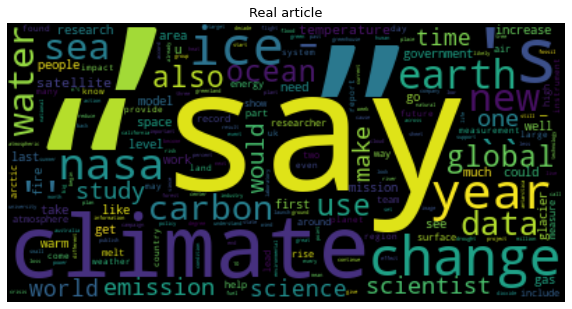

In [87]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d_real)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('\n'.join(wrap("Real article",60)),fontsize=13)
plt.show()

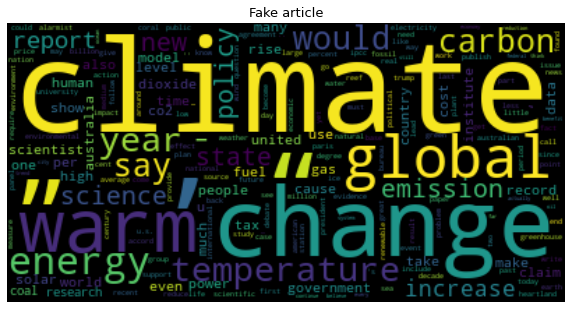

In [88]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d_fake)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('\n'.join(wrap("Fake article",60)),fontsize=13)
plt.show()

# Modelling

## One-class SVM

In [41]:
# One class SVM
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.55) 
clf.fit(tf_idf)

predictions = clf.predict(dev_bow_tfidf)
predictions[predictions == -1] = 0

print("Predictions:")
print(predictions)
dev_label = np.array(dev_label, dtype='int64')
print("True label:")
print(dev_label)

Predictions:
[1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1]
True label:
[1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1]


In [42]:
p_oneclass, r_oneclass, f_oneclass = scoring_func(predictions, dev_label)

Performance on the positive class (documents with misinformation):
Precision = 0.6181818181818182
Recall    = 0.68
F1        = 0.6476190476190475


## Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest
clf_iso_forest = IsolationForest(contamination=0.3)
clf_iso_forest.fit(tf_idf)

predictions_iso = clf_iso_forest.predict(dev_bow_tfidf) # isolation forest perform very poor on tf_idf
predictions_iso[predictions_iso == -1] = 0 

In [44]:
p_iso, r_iso, f_iso = scoring_func(predictions_iso, dev_label)

Performance on the positive class (documents with misinformation):
Precision = 0.4714285714285714
Recall    = 0.66
F1        = 0.55


## Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB(alpha=0.1)
clf_nb.fit(tf_idf, label)
predictions_nb = clf_nb.predict(dev_bow_tfidf)

In [46]:
p_nb, r_nb, f_nb = scoring_func(predictions_nb, dev_label)

Performance on the positive class (documents with misinformation):
Precision = 0.7857142857142857
Recall    = 0.88
F1        = 0.830188679245283


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=10000, random_state=123, max_iter=5000, solver='liblinear')
clf_lr.fit(tf_idf, label)
predictions_lr = clf_lr.predict(dev_bow_tfidf)

In [48]:
p_lr, r_lr, f_lr = scoring_func(predictions_lr, dev_label)

Performance on the positive class (documents with misinformation):
Precision = 0.9361702127659575
Recall    = 0.88
F1        = 0.9072164948453608


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', verbose=1, n_jobs=-1, random_state=0)
clf_forest.fit(tf_idf, label)
predictions_rf = clf_forest.predict(dev_bow_tfidf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [50]:
p_rf, r_rf, f_rf = scoring_func(predictions_rf, dev_label)

Performance on the positive class (documents with misinformation):
Precision = 0.7454545454545455
Recall    = 0.82
F1        = 0.780952380952381


# Evaluating

In [37]:
from sklearn.metrics import precision_recall_fscore_support

def scoring_func(y_pred, y_true):
    
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, pos_label=1, average="binary")

    print("Performance on the positive class (documents with misinformation):")
    print("Precision =", p)
    print("Recall    =", r)
    print("F1        =", f)
    
    return p, r, f

In [ ]:
# Visualizing results